# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.POSE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        # print(results)
        
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
if results.face_landmarks is not None:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    face = np.zeros(1404)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.58179182,  0.54436225, -0.95428073, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
# 468*3 = 1404 (khuôn mặt).
# 33*4 = 132 (cơ thể).
# 21*3 + 21*3 = 126 (hai bàn tay).
468*3+33*4+21*3+21*3

1662

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.58179182,  0.54436225, -0.95428073, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [24]:
DATA_PATH = os.path.join('E:\Data\MP_Data') 

# actions = np.array(['left', 'right', 'down', 'up', 'stop'])
actions = np.array(['other actions'])

# Số video
no_sequences = 150

# Số frame
sequence_length = 30

start_folder = 0

In [25]:
# Dùng cho trường hơp mới tạo dataset
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [22]:
# Dùng cho trường hợp thêm video vào dataset đã có sẵn
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    print("Loading model, please wait...")
    cv2.putText(image, 'Loading model, please wait...', (120, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
    cv2.imshow('OpenCV Feed', image)
    cv2.waitKey(10000)  

    for action in actions:
        for sequence in range(start_folder, start_folder+no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000) 
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
  
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

Loading model, please wait...


In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
actions = np.array(['left', 'right', 'down', 'up', 'stop', 'other actions'])
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'left': 0, 'right': 1, 'down': 2, 'up': 3, 'stop': 4, 'other actions': 5}

In [30]:
def count_videos_in_folder(folder_path):
    total_videos = 0
    label_folders = os.listdir(folder_path)
    
    for label in label_folders:
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            subfolders = [f for f in os.listdir(label_path) if os.path.isdir(os.path.join(label_path, f))]
            total_videos += len(subfolders)
            print(f"Nhãn '{label}' có {len(subfolders)} video (thư mục)")
    
    print(f"Tổng số video (thư mục): {total_videos}")

# Gọi hàm với đường dẫn đến folder chứa dữ liệu
count_videos_in_folder(DATA_PATH)

Nhãn 'down' có 150 video (thư mục)
Nhãn 'left' có 150 video (thư mục)
Nhãn 'other actions' có 150 video (thư mục)
Nhãn 'right' có 150 video (thư mục)
Nhãn 'stop' có 150 video (thư mục)
Nhãn 'up' có 150 video (thư mục)
Tổng số video (thư mục): 900


In [31]:
def count_videos_in_1_label(folder_path):
    label_folders = os.listdir(folder_path)
    
    for label in label_folders:
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            subfolders = [f for f in os.listdir(label_path) if os.path.isdir(os.path.join(label_path, f))]
            return len(subfolders)
    
num_video_in_label = count_videos_in_1_label(DATA_PATH)

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in range(num_video_in_label):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [33]:
np.array(sequences).shape

(900, 30, 1662)

In [34]:
np.array(labels).shape

(900,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(900, 30, 1662)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
print("Số lượng mẫu: ", len(X))
print("Số lượng mẫu train: ", len(X_train))
print("Số lượng mẫu valid: ", len(X_test))

Số lượng mẫu:  900
Số lượng mẫu train:  720
Số lượng mẫu valid:  180


In [40]:
y_test.shape

(180, 6)

# 7. Build and Train LSTM Neural Network

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, GRU
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

import csv
import time

In [42]:
model = Sequential()

# model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(30,1662)))
# model.add(LSTM(64, return_sequences=True, activation='relu'))
# model.add(LSTM(96, return_sequences=False, activation='relu'))
# model.add(BatchNormalization())

model.add(GRU(32, return_sequences=True, input_shape = (30, 1662)))
model.add(GRU(64, return_sequences=True))
model.add(GRU(128, return_sequences=False))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
class TimeHistory(tf.keras.callbacks.Callback):
    def __init__(self, train_time_path):
        super(TimeHistory, self).__init__()
        self.train_time_path = train_time_path
        self.times = []
        self.epoch_start_time = None

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        elapsed_time = time.time() - self.epoch_start_time
        self.times.append(elapsed_time)
        
        with open(self.train_time_path, 'a', newline='') as f:
            writer = csv.writer(f)
            if f.tell() == 0:  
                writer.writerow(['epoch', 'time'])
            writer.writerow([epoch, elapsed_time])

In [45]:
model.summary()

early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=200,
        restore_best_weights=True,
        verbose=1
)

best_model_filepath = './model_6_labels/best_model.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        best_model_filepath,
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

time_log_path = './model_6_labels/train_time_epoch.csv'
csv_log_path = './model_6_labels/training_log.csv'

if os.path.exists(time_log_path):
    os.remove(time_log_path)
    print(f"Đã xóa file: {time_log_path}")
if os.path.exists(csv_log_path):
    os.remove(csv_log_path)
    print(f"Đã xóa file: {csv_log_path}")

time_callback = TimeHistory(time_log_path)
csv_logger = CSVLogger(csv_log_path, append=False, separator=';')

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 32)            162816    
                                                                 
 gru_1 (GRU)                 (None, 30, 64)            18816     
                                                                 
 gru_2 (GRU)                 (None, 128)               74496     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

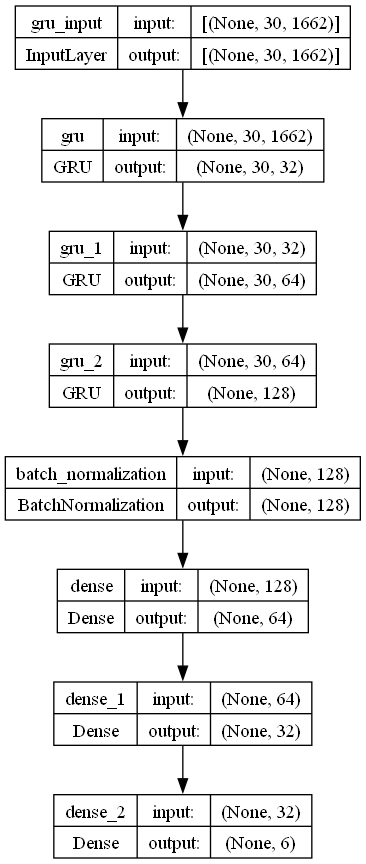

In [46]:
plot_model(model, to_file='./model_6_labels/model_diagram.png', show_shapes=True, show_layer_names=True)

In [47]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=1000, 
    callbacks=[tb_callback, model_checkpoint, early_stopping_callbacks, csv_logger, time_callback]
)

Epoch 1/1000


22/23 [===========================>..] - ETA: 0s - loss: 1.3394 - categorical_accuracy: 0.5327
Epoch 1: val_loss improved from inf to 1.72532, saving model to ./model_6_labels\best_model.h5
23/23 [==============================] - 5s 62ms/step - loss: 1.3300 - categorical_accuracy: 0.5361 - val_loss: 1.7253 - val_categorical_accuracy: 0.2611
Epoch 2/1000
 4/23 [====>.........................] - ETA: 0s - loss: 0.8773 - categorical_accuracy: 0.7656

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/23 [==========================>...] - ETA: 0s - loss: 0.7580 - categorical_accuracy: 0.7946
Epoch 2: val_loss improved from 1.72532 to 1.63201, saving model to ./model_6_labels\best_model.h5
23/23 [==============================] - 1s 28ms/step - loss: 0.7393 - categorical_accuracy: 0.8000 - val_loss: 1.6320 - val_categorical_accuracy: 0.2167
Epoch 3/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.4834 - categorical_accuracy: 0.8676
Epoch 3: val_loss improved from 1.63201 to 1.42148, saving model to ./model_6_labels\best_model.h5
23/23 [==============================] - 1s 28ms/step - loss: 0.4839 - categorical_accuracy: 0.8653 - val_loss: 1.4215 - val_categorical_accuracy: 0.5889
Epoch 4/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3312 - categorical_accuracy: 0.8949
Epoch 4: val_loss did not improve from 1.42148
23/23 [==============================] - 1s 26ms/step - loss: 0.3305 - categorical_accuracy: 0.8944 - val_loss: 1.8618 - val_categorical

In [48]:
model_path = './model_6_labels/last_model.h5'
        
# Lưu mô hình đã huấn luyện
model.save(model_path)
print("Model created")

Model created


# 8. Make Predictions

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy import stats

6/6 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.97      0.97      0.97        32
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        36

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



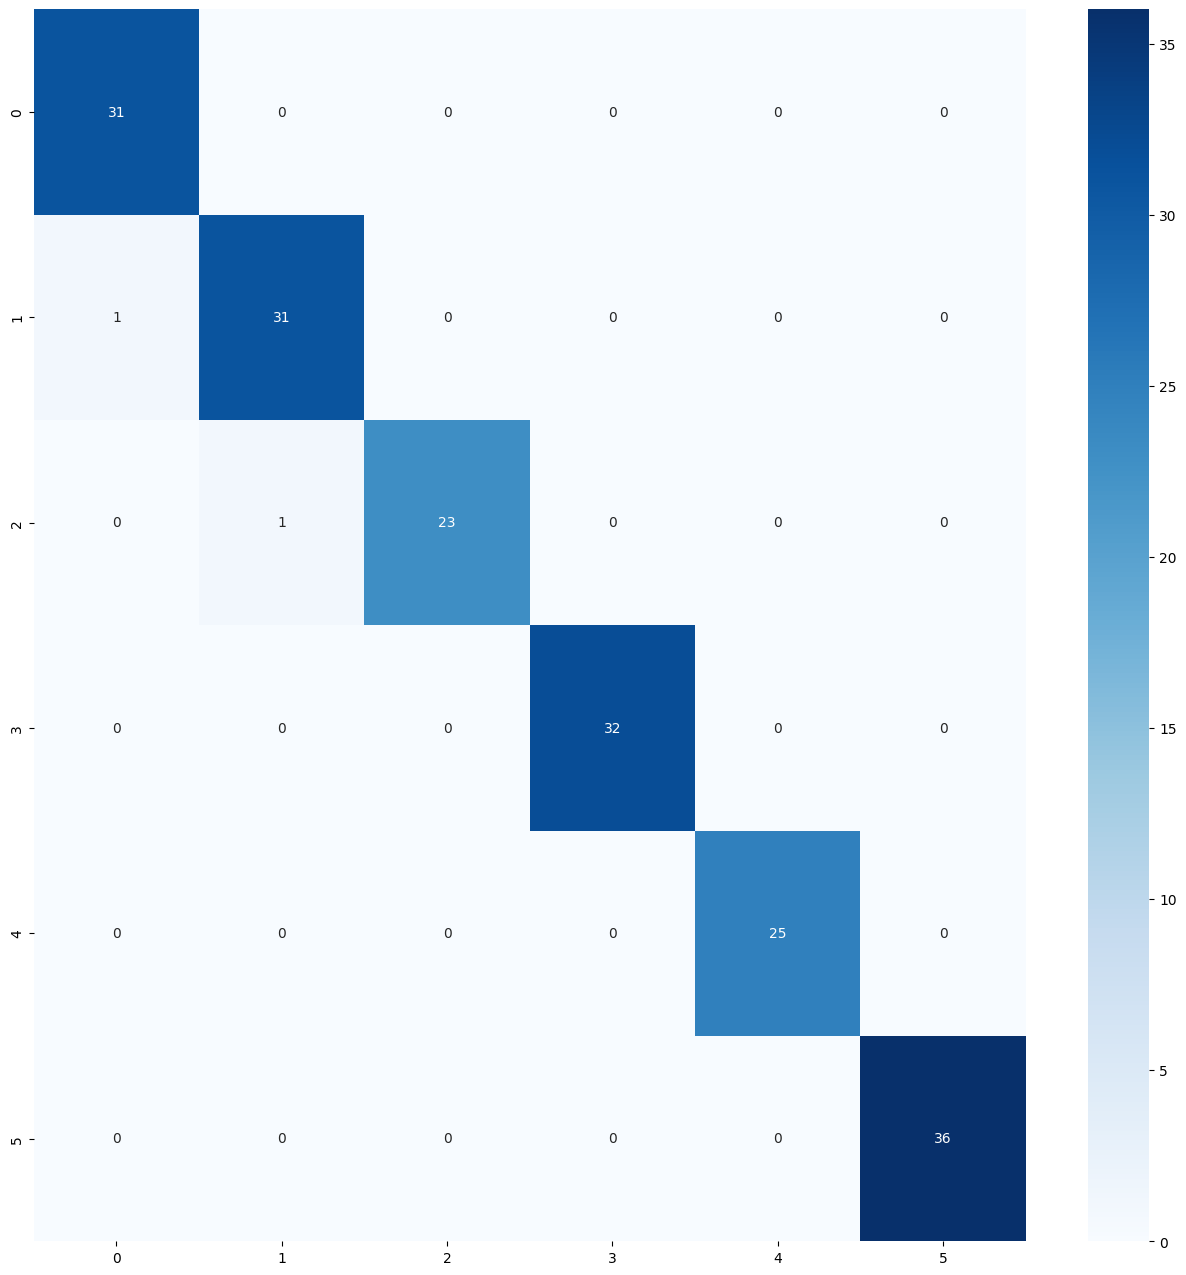

In [50]:
best_model = tf.keras.models.load_model('./model_6_labels/best_model.h5')

# Nếu y_test đang ở dạng one-hot encoded, chuyển nó thành dạng nhãn đơn
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    true_classes = np.argmax(y_test, axis=1)
else:
    true_classes = np.array(y_test)

# Dự đoán các lớp từ X_test
predicted_classes = np.argmax(best_model.predict(X_test), axis=1)

# Hiển thị confusion matrix
confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(16, 16))
sns.heatmap(confusionmatrix, cmap='Blues', annot=True, cbar=True)

# Lưu ma trận nhầm lẫn
output_path_conf = './model_6_labels/conf_matrix.png'
plt.savefig(output_path_conf)

# In classification report
print(classification_report(true_classes, predicted_classes))

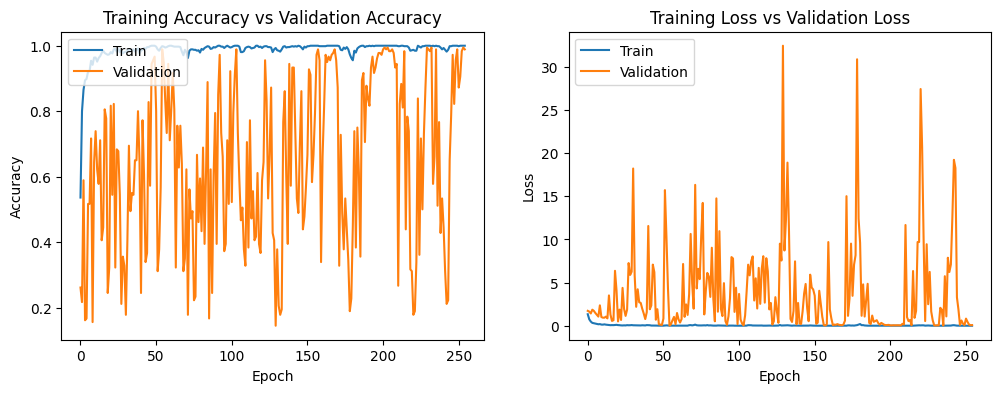

In [51]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['categorical_accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['categorical_accuracy'])
ax[0].plot(history.history['val_categorical_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

output_path_trainhis = './model_6_labels/training_his.png' 
plt.savefig(output_path_trainhis)

plt.show()

# 9. Save Weights

In [52]:
model.save('./model_6_labels/weight_model.h5')

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
model.load_weights('./model_6_labels/weight_model.h5')

# 10. Test in Real Time

In [ ]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)

        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

            # Chỉ thêm vào 'sentence' nếu xác suất cao hơn threshold
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            # Giới hạn câu hiển thị không quá 1 hành động
            if len(sentence) > 1: 
                sentence = sentence[-1:]

            # Trực quan hóa chỉ các nhãn có xác suất vượt quá threshold
            image = prob_viz([prob if prob > threshold else 0 for prob in res], actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('x'):
            break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 639ms/step
left


NameError: name 'prob_viz' is not defined

: 

In [20]:
cap.release()
cv2.destroyAllWindows()